In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [3]:
from tensorflow.keras.models import load_model

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the trained model
model = load_model('/content/drive/MyDrive/Project_8/job_demand_forecasting_model.keras')

In [30]:
# Check the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 3, 50)          │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │         1,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,262 (415.09 KB)

 Trainable params: 35,420 (138.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 70,842 (276.73 KB)

In [8]:
#Sample user profile for recommendations
user_profile = {
    'skills' : ['Python', 'Machine Learning', 'Data Analysis'],
    'preferred_industry' : 'Technology',
    'preferred_location' : 'Remote',
    'education_level' : 'Bachelor',
    'experience_level' : 'Entry Level',
    'job_title' : 'Data Scientist',
    'salary_range' : '50000-75000'
}

In [9]:
# Sample job postings dataset
job_postings_df = pd.DataFrame([
    {"title": "Data Scientist", "description": "Experience in Python, Machine Learning, and AI.",
     "skills": ["Python", "Machine Learning"], "location": "Remote", "salary": 65000,
     "industry": "Technology", "education": "Bachelor", "experience": "Entry Level",
     "contract": "Full-time", "company_rating": 4.5},

    {"title": "Software Engineer", "description": "Proficient in Java, React, and Backend development.",
     "skills": ["Java", "React"], "location": "New York", "salary": 75000,
     "industry": "Technology", "education": "Bachelor", "experience": "Mid Level",
     "contract": "Full-time", "company_rating": 4.2},

    {"title": "Data Analyst", "description": "Expert in SQL, Data Visualization, and Python.",
     "skills": ["SQL", "Data Visualization", "Python"], "location": "Remote", "salary": 55000,
     "industry": "Finance", "education": "Bachelor", "experience": "Entry Level",
     "contract": "Part-time", "company_rating": 4.0},

    {"title": "AI Researcher", "description": "Experience in Deep Learning, NLP, and Python.",
     "skills": ["Deep Learning", "NLP", "Python"], "location": "California", "salary": 90000,
     "industry": "Technology", "education": "PhD", "experience": "Senior Level",
     "contract": "Full-time", "company_rating": 4.8},

    {"title": "Marketing Analyst", "description": "Expert in Market Research, SEO, and Python.",
     "skills": ["Market Research", "SEO", "Python"], "location": "London", "salary": 60000,
     "industry": "Marketing", "education": "Bachelor", "experience": "Mid Level",
     "contract": "Freelance", "company_rating": 4.3}
])

In [10]:
# Display the dataset
print(job_postings_df)

               title                                        description  \
0     Data Scientist    Experience in Python, Machine Learning, and AI.   
1  Software Engineer  Proficient in Java, React, and Backend develop...   
2       Data Analyst     Expert in SQL, Data Visualization, and Python.   
3      AI Researcher      Experience in Deep Learning, NLP, and Python.   
4  Marketing Analyst        Expert in Market Research, SEO, and Python.   

                              skills    location  salary    industry  \
0         [Python, Machine Learning]      Remote   65000  Technology   
1                      [Java, React]    New York   75000  Technology   
2  [SQL, Data Visualization, Python]      Remote   55000     Finance   
3       [Deep Learning, NLP, Python]  California   90000  Technology   
4     [Market Research, SEO, Python]      London   60000   Marketing   

  education    experience   contract  company_rating  
0  Bachelor   Entry Level  Full-time             4.5  
1  Bac

In [11]:
# Accessing job descriptions
print(job_postings_df["description"])

0      Experience in Python, Machine Learning, and AI.
1    Proficient in Java, React, and Backend develop...
2       Expert in SQL, Data Visualization, and Python.
3        Experience in Deep Learning, NLP, and Python.
4          Expert in Market Research, SEO, and Python.
Name: description, dtype: object


Method 1: Tfidf and cosine similarities

Extract Job Features Using NLP(TF-IDF, Word2Vec)

In [12]:
# Convert job descriptions into numerical vectors
vectorizer  = TfidfVectorizer()
job_vectors = vectorizer.fit_transform(job_postings_df['description'])

In [13]:
job_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35 stored elements and shape (5, 21)>

In [14]:
# Convert user skills to a search query vector
user_vector = vectorizer.transform([' '.join(user_profile['skills'])])

In [15]:
user_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (1, 21)>

In [16]:
# Compute similarity between user profile & job description
similarity_scores = cosine_similarity(user_vector, job_vectors).flatten()

In [17]:
similarity_scores

array([0.56606208, 0.        , 0.36360684, 0.27847508, 0.08760345])

In [18]:
#Factor in Location Preference (Boost score if location matches)
job_postings_df['location_match'] = job_postings_df['location'].apply(lambda x: 1 if x == user_profile['preferred_location'] else 0)

In [19]:
#Factor in Industry Preference (Boost score if industry matches)
job_postings_df['industry_match'] = job_postings_df['industry'].apply(lambda x: 1 if x == user_profile['preferred_industry'] else 0)

In [21]:
# Convert salary range string into a tuple of integers
salary_min, salary_max = map(int, user_profile['salary_range'].split('-'))

In [22]:
# Salary Match (Boost jobs within the preferred salary range)
job_postings_df['salary_match'] = job_postings_df['salary'].apply(lambda x: 1 if salary_min <= x <= salary_max else 0)

In [23]:
# Compute Final Recommendation Score (Weighted combination of factors)
final_scores = (
    (0.6 * similarity_scores) +
    (0.2 * job_postings_df['location_match'].values) +
    (0.1 * job_postings_df['industry_match'].values) +
    (0.1 * job_postings_df['salary_match'].values) +
    (0.05 * job_postings_df['company_rating'].values)  # Factor in company rating
)

In [24]:
final_scores

array([0.96463725, 0.41      , 0.7181641 , 0.50708505, 0.36756207])

In [25]:
# Rank Job Recommendations
job_postings_df['final_score'] = final_scores
recommended_jobs = job_postings_df.sort_values(by='final_score', ascending=False)

In [26]:
# Display Top Job Recommendations
print(recommended_jobs[['title', 'salary', 'location', 'industry', 'company_rating']])

               title  salary    location    industry  company_rating
0     Data Scientist   65000      Remote  Technology             4.5
2       Data Analyst   55000      Remote     Finance             4.0
3      AI Researcher   90000  California  Technology             4.8
1  Software Engineer   75000    New York  Technology             4.2
4  Marketing Analyst   60000      London   Marketing             4.3


Method 2:

In [28]:
def preprocess_user_input(user_profile, vectorizer):
  """ Convert user skills into numerical format"""
  user_vector = vectorizer.transform([' '.join(user_profile['skills'])])
  return user_vector.toarray()

Generate Job Recommendations

In [37]:
# Ensure correct feature count for reshaping
desired_feature_count = 20

In [38]:
# Trim excess features if necessary
user_vector_trimmed = user_vector[:, :desired_feature_count]  # Keep only first 20

In [40]:
# Expand user vector by duplicating it across 3 time steps
user_vector_expanded = np.tile(user_vector_trimmed, (3, 1))  # (3, 20)

In [41]:
# Reshape correctly for model input
user_vector_reshaped = user_vector_expanded.reshape(1, 3, 20)

In [44]:
user_vector_reshaped.shape

(1, 3, 20)

In [45]:
# make predictions using the trained model
user_vector = preprocess_user_input(user_profile, vectorizer)


In [46]:
user_vector.shape

(1, 21)

In [47]:
predictions = model.predict(user_vector_reshaped)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
[[0.20332089 0.23539042 0.2926943  0.22489402 0.28281954 0.2374922
  0.24400039 0.23517142 0.3462685  0.27114695 0.23666751 0.1542018
  0.23338902 0.2877601  0.23115166 0.17478508 0.32419318 0.2155129
  0.16245946 0.23875672]]


In [51]:
print(predictions.shape)

(1, 20)


In [52]:
print(job_postings_df.shape)

(5, 14)


In [53]:
job_postings_df['relevance_score'] = predictions.flatten()[:len(job_postings_df)]

In [54]:
job_postings_df['relevance_score']

,relevance_score
0,0.203321
1,0.235390
2,0.292694
3,0.224894
4,0.282820


In [55]:
recommended_jobs = job_postings_df.sort_values(by='relevance_score', ascending=False)

In [56]:
recommended_jobs

,title,description,skills,location,salary,industry,education,experience,contract,company_rating,location_match,industry_match,salary_match,final_score,relevance_score
2,Data Analyst,"Expert in SQL, Data Visualization, and Python.","[SQL, Data Visualization, Python]",Remote,55000,Finance,Bachelor,Entry Level,Part-time,4.0,1,0,1,0.718164,0.292694
4,Marketing Analyst,"Expert in Market Research, SEO, and Python.","[Market Research, SEO, Python]",London,60000,Marketing,Bachelor,Mid Level,Freelance,4.3,0,0,1,0.367562,0.282820
1,Software Engineer,"Proficient in Java, React, and Backend develop...","[Java, React]",New York,75000,Technology,Bachelor,Mid Level,Full-time,4.2,0,1,1,0.410000,0.235390
3,AI Researcher,"Experience in Deep Learning, NLP, and Python.","[Deep Learning, NLP, Python]",California,90000,Technology,PhD,Senior Level,Full-time,4.8,0,1,0,0.507085,0.224894
0,Data Scientist,"Experience in Python, Machine Learning, and AI.","[Python, Machine Learning]",Remote,65000,Technology,Bachelor,Entry Level,Full-time,4.5,1,1,1,0.964637,0.203321


In [57]:
print(recommended_jobs[["title", "salary", "location", "industry", "relevance_score"]])

               title  salary    location    industry  relevance_score
2       Data Analyst   55000      Remote     Finance         0.292694
4  Marketing Analyst   60000      London   Marketing         0.282820
1  Software Engineer   75000    New York  Technology         0.235390
3      AI Researcher   90000  California  Technology         0.224894
0     Data Scientist   65000      Remote  Technology         0.203321


In [58]:
recommended_jobs["relevance_score"] = (recommended_jobs["relevance_score"] * 100).round(2)


In [59]:
recommended_jobs = recommended_jobs[recommended_jobs["relevance_score"] > 20]


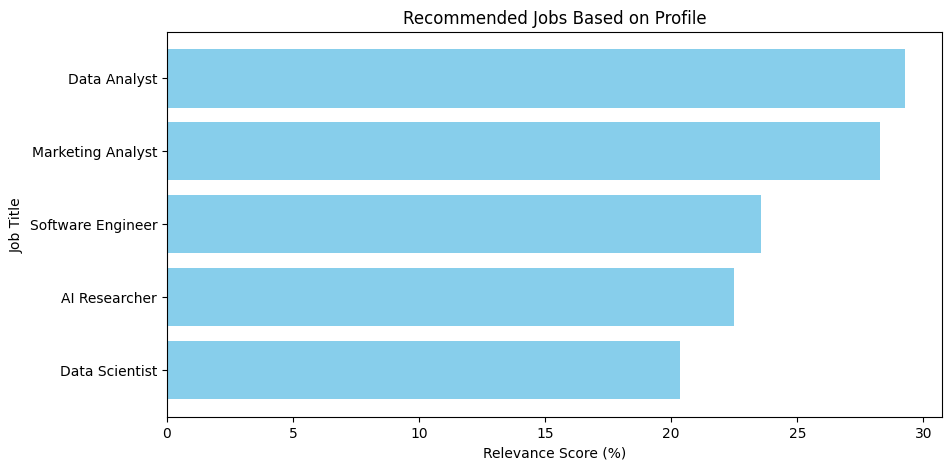

In [61]:
plt.figure(figsize=(10, 5))
plt.barh(recommended_jobs["title"], recommended_jobs["relevance_score"], color="skyblue")
plt.xlabel("Relevance Score (%)")
plt.ylabel("Job Title")
plt.title("Recommended Jobs Based on Profile")
plt.gca().invert_yaxis()  # Highest score at the top
plt.show()
